# Model Development: 
## Neural Network on Target Trait E_I

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2]:
data = pd.read_csv('../data/cleaned/expanded_mbti_df.csv')

In [3]:
data.head()

,type,posts,comp_score,neg_score,neu_score,pos_score,post_count,avg_word_count,posts_cleaned,cleaned_comp_score,...,diff_comp_init-no_punct,E_I,N_S,F_T,J_P,E_I_code,N_S_code,F_T_code,J_P_code,type_code
0,INFJ,"[""'http://www.youtube.com/watch?v=qsXHcwe3krw""...",0.9877,0.054,0.829,0.116,50,90,['enfp and intj moments sportscenter not top t...,0.9839,...,0.0074,I,N,F,J,0,1,1,1,111
1,ENTP,"[""'I'm finding the lack of me in these posts v...",0.9994,0.068,0.752,0.180,50,138,"[""'I'm finding the lack of me in these posts v...",0.9993,...,0.0009,E,N,T,P,1,1,0,0,1100
2,INTP,"[""'Good one _____ https://www.youtube.com/w...",0.9985,0.074,0.751,0.175,50,102,"[""'Good one _____"", ""Of course, to which I say...",0.9985,...,0.0009,I,N,T,P,0,1,0,0,100
3,INTJ,"[""'Dear INTP, I enjoyed our conversation the...",0.9966,0.054,0.841,0.106,50,122,"[""'Dear INTP, I enjoyed our conversation the o...",0.9972,...,-0.0005,I,N,T,J,0,1,0,1,101
4,ENTJ,"[""'You're fired."", ""That's another silly misco...",0.9725,0.114,0.748,0.138,50,119,"[""'You're fired."", ""That's another silly misco...",0.9420,...,0.0218,E,N,T,J,1,1,0,1,1101


In [4]:
X = data.posts_no_digits

In [5]:
y = data.E_I_code

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = y)

In [7]:
tokenizer = Tokenizer(750)

tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(x_train)
x_test = pad_sequences(x_test)

<br>

***
***
***

<br>

In [8]:
model_5 = Sequential()
model_5.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_5.add(LSTM(64, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2))
model_5.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model_5.add(Dense(200, activation = 'relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_5 = model_5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 960s 4s/step - loss: 0.5485 - accuracy: 0.7679 - val_loss: 0.5375 - val_accuracy: 0.7695
Epoch 2/25
217/217 [==============================] - 818s 4s/step - loss: 0.5244 - accuracy: 0.7700 - val_loss: 0.5309 - val_accuracy: 0.7706
Epoch 3/25
217/217 [==============================] - 962s 4s/step - loss: 0.5107 - accuracy: 0.7774 - val_loss: 0.5334 - val_accuracy: 0.7700
Epoch 4/25
217/217 [==============================] - 994s 5s/step - loss: 0.5387 - accuracy: 0.7697 - val_loss: 0.5449 - val_accuracy: 0.7695
Epoch 5/25
217/217 [==============================] - 1078s 5s/step - loss: 0.5407 - accuracy: 0.7696 - val_loss: 0.5407 - val_accuracy: 0.7695
Epoch 6/25
217/217 [==============================] - 1143s 5s/step - loss: 0.5412 - accuracy: 0.7696 - val_loss: 0.5405 - val_accuracy: 0.7695
Epoch 7/25
217/217 [==============================] - 1032s 5s/step - loss: 0.5405 - accuracy: 0.7697 - val_loss: 0.5401 - val_accuracy: 0.7

Text(0.5, 1.0, 'Results')

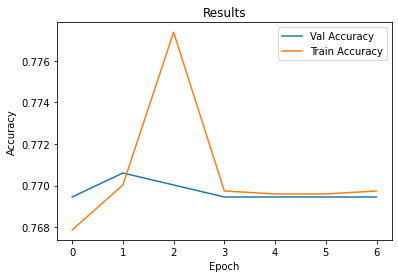

In [9]:
plt.plot(history_5.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')

<br>

***
***
***

<br>

In [10]:
model_6 = Sequential()
model_6.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_6.add(Conv1D(64, 10, activation = 'relu'))
model_6.add(MaxPooling1D(5))
model_6.add(Conv1D(32, 7, activation = 'relu'))
model_6.add(Dense(1, activation = 'sigmoid'))

model_6.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_6 = model_6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 47s 215ms/step - loss: 0.5421 - accuracy: 0.7694 - val_loss: 0.5269 - val_accuracy: 0.7696
Epoch 2/25
217/217 [==============================] - 45s 210ms/step - loss: 0.5280 - accuracy: 0.7724 - val_loss: 0.5280 - val_accuracy: 0.7745
Epoch 3/25
217/217 [==============================] - 45s 209ms/step - loss: 0.5214 - accuracy: 0.7747 - val_loss: 0.5202 - val_accuracy: 0.7753
Epoch 4/25
217/217 [==============================] - 46s 210ms/step - loss: 0.5179 - accuracy: 0.7762 - val_loss: 0.5192 - val_accuracy: 0.7766
Epoch 5/25
217/217 [==============================] - 49s 224ms/step - loss: 0.5170 - accuracy: 0.7771 - val_loss: 0.5237 - val_accuracy: 0.7773
Epoch 6/25
217/217 [==============================] - 59s 271ms/step - loss: 0.5131 - accuracy: 0.7782 - val_loss: 0.5190 - val_accuracy: 0.7779
Epoch 7/25
217/217 [==============================] - 59s 273ms/step - loss: 0.5096 - accuracy: 0.7794 - val_loss: 0.5201 - val_ac

Text(0.5, 1.0, 'Results')

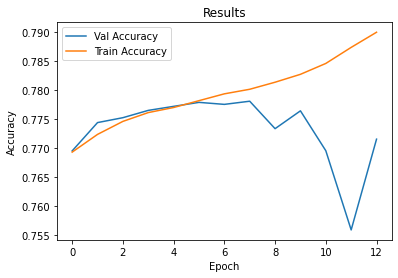

In [11]:
plt.plot(history_6.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')

<br>

***
***
***

<br>

In [12]:
model_7 = Sequential()
model_7.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_7.add(Conv1D(64, 10, activation = 'relu'))
model_7.add(MaxPooling1D(5))
model_7.add(Conv1D(32, 7, activation = 'relu'))
model_7.add(MaxPooling1D(2))
model_7.add(Dense(1, activation = 'sigmoid'))

model_7.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_7 = model_7.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 79s 366ms/step - loss: 0.5418 - accuracy: 0.7675 - val_loss: 0.5295 - val_accuracy: 0.7709
Epoch 2/25
217/217 [==============================] - 73s 334ms/step - loss: 0.5218 - accuracy: 0.7732 - val_loss: 0.5196 - val_accuracy: 0.7747
Epoch 3/25
217/217 [==============================] - 76s 352ms/step - loss: 0.5188 - accuracy: 0.7754 - val_loss: 0.5220 - val_accuracy: 0.7758
Epoch 4/25
217/217 [==============================] - 73s 335ms/step - loss: 0.5172 - accuracy: 0.7765 - val_loss: 0.5220 - val_accuracy: 0.7750
Epoch 5/25
217/217 [==============================] - 71s 329ms/step - loss: 0.5135 - accuracy: 0.7780 - val_loss: 0.5244 - val_accuracy: 0.7741
Epoch 6/25
217/217 [==============================] - 90s 414ms/step - loss: 0.5132 - accuracy: 0.7788 - val_loss: 0.5181 - val_accuracy: 0.7783
Epoch 7/25
217/217 [==============================] - 74s 342ms/step - loss: 0.5101 - accuracy: 0.7795 - val_loss: 0.5175 - val_ac

Text(0.5, 1.0, 'Results')

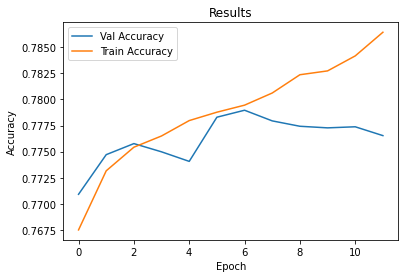

In [13]:
plt.plot(history_7.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_7.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')